## Scenario comparison: Mass and Energy

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.size': 12})

In [2]:
cmap_mat = mpl.cm.get_cmap('Paired')
cmap_ener = mpl.cm.get_cmap('Accent')

In [3]:
# read data directly from capacity and material excel sheets into a single dataframe
# - data names
dict_names = {'material_use': ['Primary materials', 'Secondary materials', 'Reused batteries', 'New batteries'],\
              'total_capacity': ['EV fleet', 'V2G', 'Reused batteries', 'New batteries']}
# - dataframe structure
df = pd.read_excel('material_use.xlsx', sheet_name = 'Primary materials', header = 0, usecols = "B:E", engine = 'openpyxl')
# - add data
for my_key in dict_names.keys():
    for my_name in dict_names[my_key]:
        # - naming conventions - materials
        if my_key == 'material_use':
            if my_name == 'Primary materials':
                my_col = 'Raw materials'
            elif my_name == 'Secondary materials':
                my_col = 'Recycled materials'
            elif my_name == 'New batteries':
                my_col = 'NSB materials'
            elif my_name == 'Reused batteries':
                my_col = 'Reused materials'
            else:
                my_col = my_name
        # - naming conventions - energy
        elif my_key == 'total_capacity':
            if my_name == 'Reused batteries':
                my_col = "SLB"
            elif my_name == 'New batteries':
                my_col = "NSB"
            else:
                my_col = my_name
        # - add data
        df[my_col] = pd.read_excel(my_key+'.xlsx', sheet_name = my_name, header = 0, usecols = "F", engine = 'openpyxl')

In [4]:
# sort according to raw material consumption
df_ascend_rawm = df.sort_values(by = ['Raw materials'], ascending = False)
df_ascend_rawm.reset_index(inplace = True)

In [5]:
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 45,
#                        ):
#     print(df_ascend_rawm)

In [6]:
df_ascend_rawm.columns

Index(['index', 'EV Scenario', 'Reuse Scenario', 'V2G Scenario',
       'Storage Demand Scenario', 'Raw materials', 'Recycled materials',
       'Reused materials', 'NSB materials', 'EV fleet', 'V2G', 'SLB', 'NSB'],
      dtype='object')

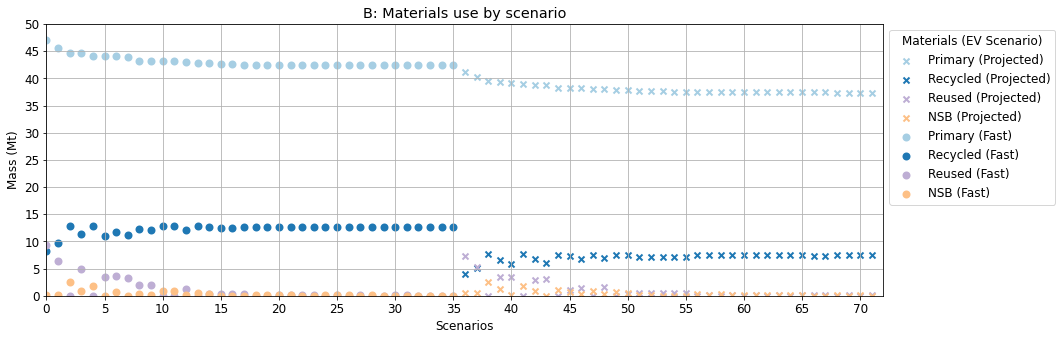

In [14]:
# Plot (materials)
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 1   
for ev_scenario in ['Slow EV', 'Fast EV']:
    if ev_scenario == 'Slow EV':
        pmarker = 'x'
        ev_label = 'Projected'
    if ev_scenario == 'Fast EV':
        pmarker = 'o'
        ev_label = 'Fast'
    for col in ['Raw materials', 'Recycled materials', 'Reused materials', 'NSB materials']:
        if col == 'Raw materials':
            # pcolor = 'tab:grey'
            pcolor = np.array([cmap_mat(0)])
            # plabel = 'Raw'
            plabel = 'Primary'
        if col == 'Recycled materials':
            # pcolor = 'tab:green'
            pcolor = np.array([cmap_mat(1)])
            plabel = 'Recycled'
        if col == 'Reused materials':
            # pcolor = 'tab:blue'
            pcolor = np.array([cmap_ener(1)])
            plabel = 'Reused'
        if col == 'NSB materials':
            # pcolor = 'tab:orange'
            pcolor = np.array([cmap_ener(2)])
            plabel = 'NSB'
        # plot
        plt.scatter(df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = plabel+' ('+ev_label+')', alpha = transp, linewidth = 2, c = pcolor)
# beautification
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 72))
plt.yticks(np.arange(0, 60, 5))
plt.ylim((0,50))
plt.xlabel('Scenarios')
plt.ylabel('Mass (Mt)')
plt.legend(loc = 'upper left', title = 'Materials (EV Scenario)', bbox_to_anchor=(1,1))
plt.title('B: Materials use by scenario')
plt.savefig('mass_by_scenario.png', dpi = 300, bbox_inches = 'tight')

In [8]:
df_ascend_rawm.columns

Index(['index', 'EV Scenario', 'Reuse Scenario', 'V2G Scenario',
       'Storage Demand Scenario', 'Raw materials', 'Recycled materials',
       'Reused materials', 'NSB materials', 'EV fleet', 'V2G', 'SLB', 'NSB'],
      dtype='object')

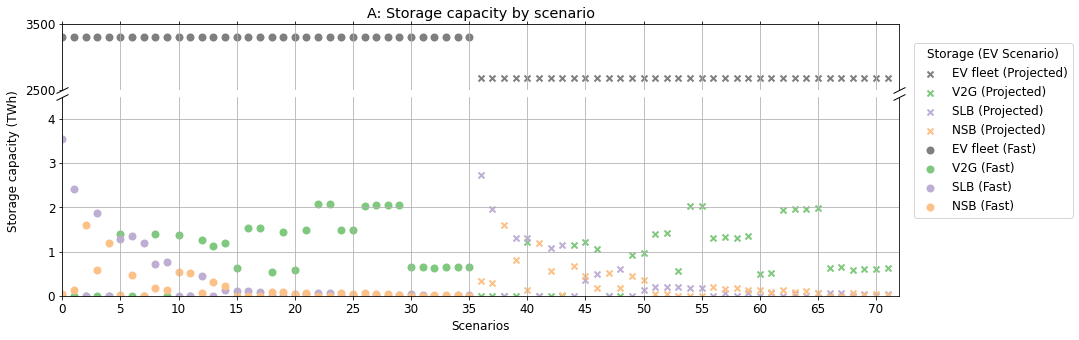

In [15]:
# Plot (storage capacity) (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html, 
# https://thepythonyouneed.com/how-to-hide-the-axes-spines-of-a-plot-with-matplotlib-using-python/)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=[15, 5], facecolor ='white', gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
transp = 1   
for ev_scenario in ['Slow EV', 'Fast EV']:
    if ev_scenario == 'Slow EV':
        pmarker = 'x'
        ev_label = 'Projected'
    if ev_scenario == 'Fast EV':
        pmarker = 'o'
        ev_label = 'Fast'
    for col in ['EV fleet', 'V2G', 'SLB', 'NSB']:
        if col == 'EV fleet':
            pcolor = 'tab:grey'
            plabel = 'EV fleet'
        if col == 'V2G':
            # pcolor = 'tab:green'
            pcolor = np.array([cmap_ener(0)])
            plabel = 'V2G'
        if col == 'SLB':
            # pcolor = 'tab:blue'
            pcolor = np.array([cmap_ener(1)])
            plabel = 'SLB'
        if col == 'NSB':
            # pcolor = 'tab:orange'
            pcolor = np.array([cmap_ener(2)])
            plabel = 'NSB'
        # plot
        ax1.scatter(df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = plabel+' ('+ev_label+')', alpha = transp, linewidth = 2, c = pcolor)
        ax2.scatter(df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = plabel+' ('+ev_label+')', alpha = transp, linewidth = 2, c = pcolor)
        
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(2.5e3, 3.5e3)  # outliers only
ax2.set_ylim(0, 4.5)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# beautification
ax1.grid(), ax2.grid()
ax1.set_yticks([2500, 3500])
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 72))
#plt.yticks(np.arange(0, 5, 0.5))
#plt.ylim((0,3.5))
plt.xlabel('Scenarios')
# plt.ylabel('Capacity (TWh)')
fig.text(0.08, 0.5, 'Storage capacity (TWh)', ha='center', va='center', rotation='vertical')
plt.legend(loc = 'upper left', title = 'Storage (EV Scenario)', bbox_to_anchor=(1.01,1.3))
ax1.set_title('A: Storage capacity by scenario')
plt.savefig('storage_capacity_by_scenario.png', dpi = 300, bbox_inches = 'tight')

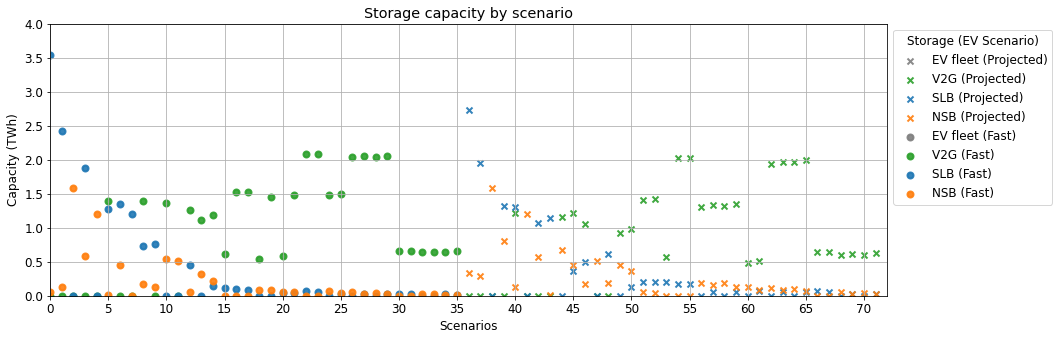

In [10]:
# Plot (storage capacity)
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.9     
for ev_scenario in ['Slow EV', 'Fast EV']:
    if ev_scenario == 'Slow EV':
        pmarker = 'x'
        ev_label = 'Projected'
    if ev_scenario == 'Fast EV':
        pmarker = 'o'
        ev_label = 'Fast'
    for col in ['EV fleet', 'V2G', 'SLB', 'NSB']:
        if col == 'EV fleet':
            pcolor = 'tab:grey'
            plabel = 'EV fleet'
        if col == 'V2G':
            pcolor = 'tab:green'
            plabel = 'V2G'
        if col == 'SLB':
            pcolor = 'tab:blue'
            plabel = 'SLB'
        if col == 'NSB':
            pcolor = 'tab:orange'
            plabel = 'NSB'
        # plot
        plt.scatter(df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_rawm.loc[df_ascend_rawm['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = plabel+' ('+ev_label+')', alpha = transp, linewidth = 2, c = pcolor)
# beautification
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 72))
plt.yticks(np.arange(0, 5, 0.5))
plt.ylim((0,4))
plt.xlabel('Scenarios')
plt.ylabel('Capacity (TWh)')
plt.legend(loc = 'upper left', title = 'Storage (EV Scenario)', bbox_to_anchor=(1,1))
plt.title('Storage capacity by scenario')
plt.savefig('storage_capacity_by_scenario.png', dpi = 300, bbox_inches = 'tight')